In [181]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [207]:
# READ AND STORING THE DATASET IN DATAFRAME
data = "C:/Users/Asus/Downloads/Dataset/breast_cancer_bd.csv"
df = pd.read_csv(data)

In [208]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [209]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [185]:
# view dimensions of dataset
df.shape

(699, 11)

Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. Here, Sample code number is the redundant column. So, I will drop it first.

In [186]:
# drop Sample code number column from dataset

df.drop('Sample code number', axis=1, inplace=True)

In [187]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [188]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [189]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.

In [190]:
for var in df.columns:
    
    print(df[var].value_counts())

Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity of Cell Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity of Cell Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64
Marginal Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single Epithelial Cell Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6    

The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to numeric.

In [191]:
# converting Bare_Nuclei to numeric
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

The parameter errors='coerce' means:

If pandas finds a value that cannot be converted to a number (like '?', 'NA', 'abc'), it will replace it with NaN (Not a Number).

In [192]:
df.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Summary of variables¶

There are 10 numerical variables in the dataset.
All of the variables are of discrete type.
Out of all the 10 variables, the first 9 variables are feature variables and last variable Class is the target variable.

In [193]:
# find missing value
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [194]:
# check frequency distribution of `Bare_Nuclei` column
df['Bare Nuclei'].value_counts()

Bare Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [195]:
# check unique values in `Bare_Nuclei` column
df['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [196]:
# check for nan values in `Bare_Nuclei` column

df['Bare Nuclei'].isna().sum()

np.int64(16)

We can see that there are 16 nan values in the dataset. I will impute missing values after dividing the dataset into training and test set.

In [197]:
# view frequency distribution of values in `Class` variable
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

We can see that the Class variable contains 2 class labels - 2 and 4. 2 stands for benign and 4 stands for malignant cancer.

In [198]:
# view summary statistics in numerical variables
print(round(df.describe(),2))

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count           699.00                   699.00                    699.00   
mean              4.42                     3.13                      3.21   
std               2.82                     3.05                      2.97   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00  

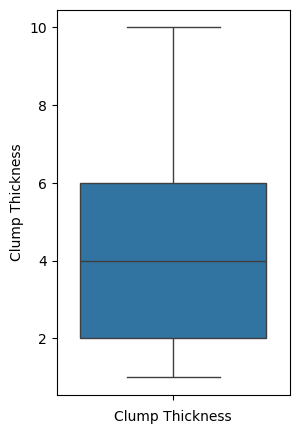

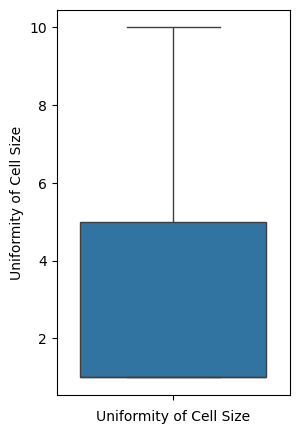

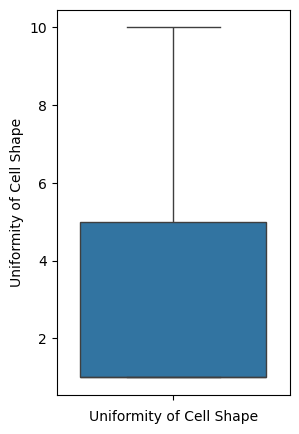

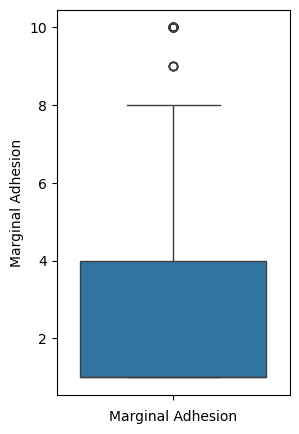

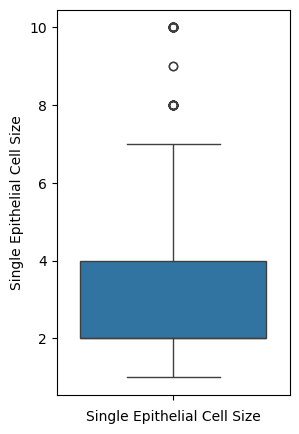

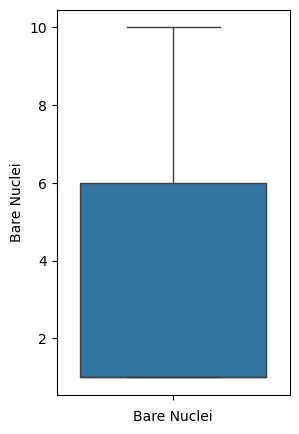

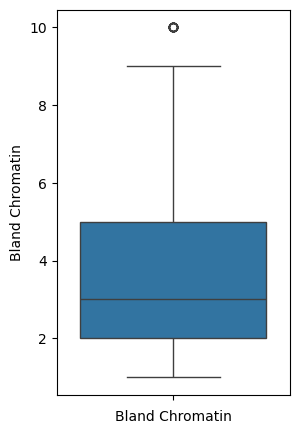

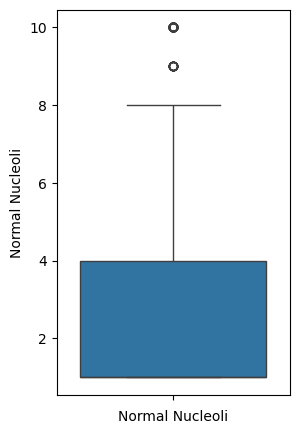

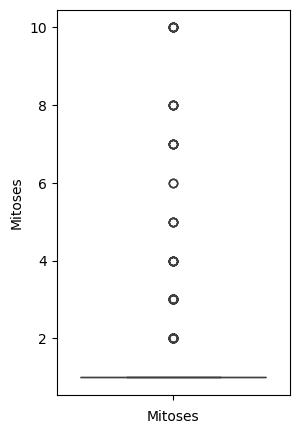

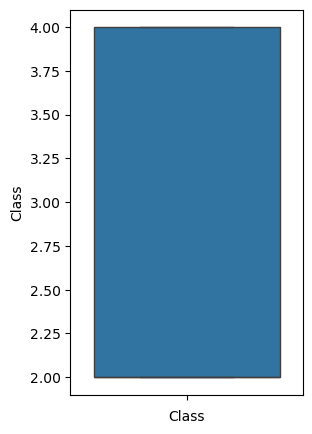

In [199]:
# draw boxplot to see the outliers
for i in df.columns:
    if df[i].dtypes != 'Class':
        plt.figure(figsize=(3,5))
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show() 

In [200]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [201]:
out_cols=['Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli','Mitoses']

In [202]:
# IQR 
for i in out_cols:
    q1= df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-IQR*1.5
    ub=q3-IQR*1.5

    df=df[(df[i]>lb)&(df[i]<ub)]

Check the distribution of variables¶
Now, plot the histograms to check variable distributions to find out if they are normal or skewed.

We can see that all the variables in the dataset are positively skewed.

Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [218]:
corr = df.corr()
corr

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


Our target variable is Class. So, we should check how each attribute correlates with the Class variable. We can do it as follows:-

In [216]:
corr['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.818968
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
Sample code number            -0.080226
Name: Class, dtype: float64

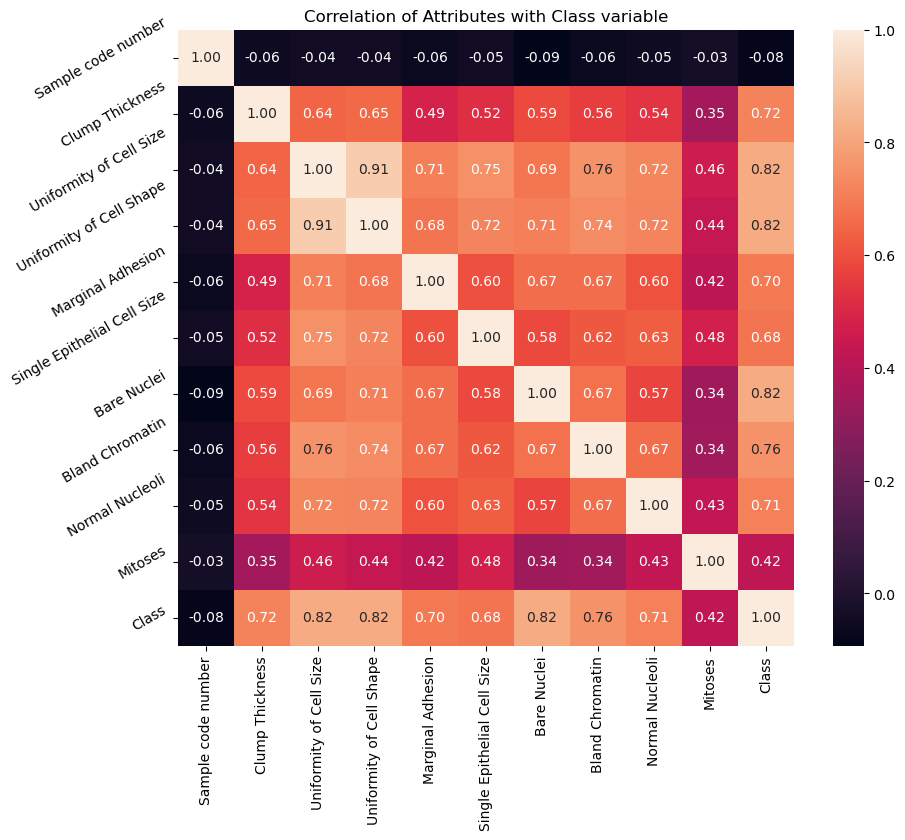

In [217]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

Interpretation¶
From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).
Uniformity_Cell_Size and Uniformity_Cell_Shape are multicolinear 

In [155]:
# find X and Y
X = df.drop(['Class'], axis=1)

y = df['Class']

In [156]:
X.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [157]:
#X.fillna(X.median(),inplace=True)  # we will use median as we have outliers

In [159]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
if len(X)>0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [219]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

In [220]:
# check data types in X_train

X_train.dtypes

Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
dtype: object

In [221]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [222]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [223]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [224]:
# impute missing values in X_train and X_test with respective column median in X_train

for df in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df[col].fillna(col_median, inplace=True)  

C:\Users\Asus\AppData\Local\Temp\ipykernel_8612\1234191580.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(col_median, inplace=True)


In [225]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [226]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [227]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [228]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

Feature Scaling 

In [229]:
cols = X_train.columns

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [231]:
X_train_scaled

array([[ 2.02838346,  0.2995061 ,  0.28957312, ..., -0.57777378,
         0.04124139, -0.32425801],
       [ 1.66945141,  2.25768045,  2.30456946, ..., -0.1599529 ,
         0.04124139, -0.32425801],
       [-1.20200501, -0.67958108, -0.71792505, ..., -0.99559467,
        -0.60816532, -0.32425801],
       ...,
       [-0.12520886, -0.67958108, -0.71792505, ..., -0.99559467,
        -0.60816532, -0.32425801],
       [ 0.2337232 , -0.67958108, -0.71792505, ..., -0.57777378,
        -0.60816532, -0.32425801],
       [-1.20200501, -0.67958108, -0.71792505, ..., -0.99559467,
        -0.60816532, -0.32425801]])

In [232]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


In [233]:
k_value=[3,5,6,7,8,9]
best_k=None
best_score=0

for k in k_value:
    model=KNeighborsClassifier(n_neighbors=k)
    cv_score= cross_val_score(model,X_train_scaled,y_train)
    mean_score= cv_score.mean()
    print(f"k:{k},mean accuracy:{mean_score:0.04f}")

    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print("Best K =", best_k)
print("Best accuracy =", best_score)

k:3,mean accuracy:0.9571
k:5,mean accuracy:0.9625
k:6,mean accuracy:0.9571
k:7,mean accuracy:0.9607
k:8,mean accuracy:0.9571
k:9,mean accuracy:0.9607
Best K = 5
Best accuracy = 0.9624678249678249


In [234]:
# train final KNN model with best K value
model=KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [235]:
# predict
y_pred=model.predict(X_test)

In [236]:
# evaluation

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification_report:\n",classification_report(y_test, y_pred))

Test Accuracy: 0.9714285714285714
Confusion_matrix:
 [[82  3]
 [ 1 54]]
Classification_report:
               precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True, cmap='YlGnBu')

plt.title('Confusion Matrix')
plt.show()



1.In this dataset,I tested different K values for KNN (3, 5, 6, 7, 8, 9) using cross-validation.
Among all of them, K = 5 gave the highest mean accuracy = 0.9625, so it was selected as the best value.

2.When I trained the model with K = 5 and tested it on unseen data, I got the Test accuracy: 0.97

3 Confusion matrix:
 82 correct benign, 3 misclassified
 54 correct malignant, 1 misclassified

4 Precision, recall, F1: All around 0.96–0.98.This means the model is performing very well on both classes, with very few mistakes.
5 K=5 turned out to be the best choice for the KNN model. It gave the highest accuracy during cross-validation and also performed very well on the test data. With this value of K, the model predicted most cases correctly, made very few mistakes and handled both benign and malignant samples well. Overall, using five nearest neighbours makes the KNN model accurate, stable and a good fit for your dataset.
